In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

# convert uppercase to lowercase

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [11]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [17]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [18]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Building Vacabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

In [35]:
tokens = [key for key in vocab if vocab[key] > 10]

In [36]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Divide dataset

In [37]:
X = data['tweet']
y = data['label']

In [38]:
!pip install scikit-learn

     -------------------------------------- 14.7/14.7 MB 420.2 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train

7256    would like wish amaz day make everi minut coun...
6856               love iphon love romanc girl iphon appl
7119    photo hahahaha awwww… feel feel instagram inst...
332     photo healthi balloon survivor haha agoogl goo...
4835    love thunderstorm thunderclap … sound app apps...
                              ...                        
5401    great new game play alreadi app store instagra...
2274    coupl pictur took photographi samsung galaxi k...
7384    lloydyb mate dont get start old aupair bought ...
2610    owner dog australianshepherd bordercolli mix i...
6122         new tele excit unbox new babi tv samsung new
Name: tweet, Length: 6336, dtype: object

In [41]:
X_test

2105                  love song fave fave itun iphon best
7677    drink red wine look photo instagram tablet sam...
6761    look nut ollo olloclip washington money art go...
5210           new toy match note phone samsung pink note
5921    fall love diy hobbi nice theday choic instaand...
                              ...                        
5381    excit appl replac phone got brand new shinni p...
3597    fact phone week old charger headphon alreadi s...
1988    hey guy look samsunggalaxysinchsimdualgb money...
2017    wait gram boredddddd thewalkingdead wait bore ...
5565    welcom boostmobil boostmobilemiami new custom ...
Name: tweet, Length: 1584, dtype: object

In [42]:
y_train

7256    0
6856    0
7119    0
332     0
4835    0
       ..
5401    0
2274    0
7384    1
2610    0
6122    0
Name: label, Length: 6336, dtype: int64

Vectorization

In [43]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(X_train, tokens)

In [45]:
vectorized_x_test = vectorizer(X_test, tokens)

In [46]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_train

7256    0
6856    0
7119    0
332     0
4835    0
       ..
5401    0
2274    0
7384    1
2610    0
6122    0
Name: label, Length: 6336, dtype: int64

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_test

2105    0
7677    0
6761    0
5210    0
5921    0
       ..
5381    0
3597    1
1988    0
2017    0
5565    0
Name: label, Length: 1584, dtype: int64

In [50]:
y_train.value_counts()

0    4701
1    1635
Name: label, dtype: int64

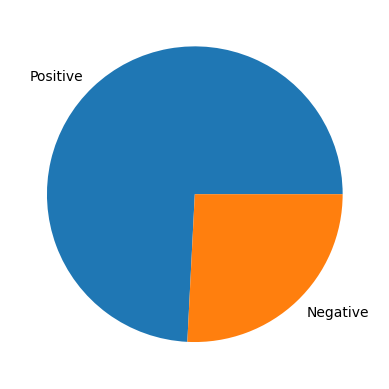

In [51]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Handle imbalanced dataset

In [52]:
!pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 3.3.0 requires joblib<1.3.0,>=0.15.1, but you have joblib 1.3.2 which is incompatible.
rasa 3.3.0 requires numpy<1.22.0,>=1.19.2, but you have numpy 1.22.4 which is incompatible.


In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9402, 1145) (9402,)


In [54]:
y_train_smote.value_counts()

0    4701
1    4701
Name: label, dtype: int64

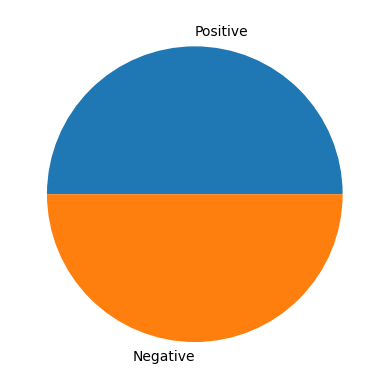

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [56]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9397    1
9398    1
9399    1
9400    1
9401    1
Name: label, Length: 9402, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test

2105    0
7677    0
6761    0
5210    0
5921    0
       ..
5381    0
3597    1
1988    0
2017    0
5565    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.912
	Recall = 0.968
	F1-Score = 0.939
Testing Scores:
	Accuracy = 0.872
	Precision = 0.695
	Recall = 0.857
	F1-Score = 0.767


## Naive Bayes

In [63]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.868
	Recall = 0.954
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.876
	Precision = 0.68
	Recall = 0.936
	F1-Score = 0.788


## Decision Tree

In [64]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.835
	Precision = 0.674
	Recall = 0.639
	F1-Score = 0.656


## Random Forest

In [65]:

rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.886
	Precision = 0.781
	Recall = 0.749
	F1-Score = 0.765


## Support Vector Machine

In [66]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.884
	Precision = 0.745
	Recall = 0.806
	F1-Score = 0.774


In [67]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)